In [3]:
# importation of the packages

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import box
import geopandas as gpd

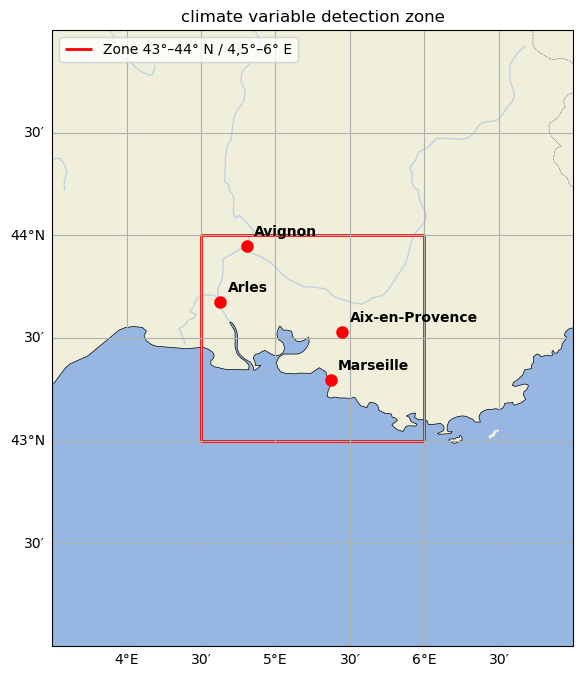

In [8]:
# 1. Define the limit of the map
north, south = 44, 43      # latitude
west,  east  = 4.5, 6      # longitude

bbox = box(west, south, east, north)          # shapely Polygon
gdf  = gpd.GeoDataFrame(geometry=[bbox], crs="EPSG:4326")

# 2. Prépare the map
fig = plt.figure(figsize=(8, 8))
ax  = plt.axes(projection=ccrs.PlateCarree())

# define the base map
ax.add_feature(cfeature.LAND,           zorder=0)
ax.add_feature(cfeature.OCEAN,          zorder=0)
ax.add_feature(cfeature.COASTLINE, lw=0.5)
ax.add_feature(cfeature.BORDERS,   lw=0.4, linestyle=":")
ax.add_feature(cfeature.LAKES,    alpha=0.4)
ax.add_feature(cfeature.RIVERS,   alpha=0.5)


# 4. Ajout des quatre villes demandées
cities = {
    "Marseille":       (5.3698, 43.2965),
    "Avignon":         (4.8055, 43.9484),
    "Aix-en-Provence": (5.4474, 43.5297),
    "Arles":           (4.6278, 43.6764)
}

for name, (lon, lat) in cities.items():
    # tracer le marqueur
    ax.plot(
        lon, lat,
        marker='o', markersize=8,
        color='red',
        transform=ccrs.PlateCarree(),
        zorder=5
    )
    # ajouter le label légèrement décalé
    ax.text(
        lon + 0.05, lat + 0.05,
        name,
        fontsize=10,
        fontweight='bold',
        transform=ccrs.PlateCarree(),
        zorder=5
    )


# 3. Show the map
gdf.boundary.plot(
    ax=ax,
    edgecolor="red",
    linewidth=2,
    transform=ccrs.PlateCarree(),      # le GeoDataFrame est en WGS84
    label="Zone 43°–44° N / 4,5°–6° E",
)

# 4. Ajust the view and add the grid
padding = 1                            # degree of margin around the box
ax.set_extent([west-padding, east+padding, south-padding, north+padding])

gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels = gl.right_labels = False   # avoid overlaps

plt.title("climate variable detection zone")
plt.legend(loc="upper left")
plt.show()
